> # **Tarea 1: Geometría Computacional y Diferencial**
>
> **Laura Sofia Rincón Sierra**

---

> Comenzamos importando las librerías necesarias para la solución de la tarea

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from time import sleep
from IPython.display import clear_output

---

> ### **Ejercicio 1**
>
> Escribir un código capaz de identificar cuando un par de segmentos comparten puntos. Hay tres respuestas posibles: los segmentos no se intersectan, los segmentos se intersectan dando el punto de intersencción, y los segmentos se intersectan dado un intervalo.
>
> Sea $S(x_1, y_1, x_2, y_2)$ el segmento que conecta los puntos $(x_1, y_1)$ y $(x_2, y_2)$. Considera los segmentos
>
> $$
S_1 = S(1,2,3,4) S_2 = S(3,4,5,6) S_3 = S(2,3,5,6) S_4 = S(4,5,5,6)
$$
>
> Utiliza tu código para evaluar las intersecciones de $S_1$ con $S_2$, $S_3$ y $S_4$.

> **Solución**
>
> Creamos la clase punto

In [2]:
'''
Clase Punto con
  Atributos: coordenada en x, coordenada en y, nombre
  Métodos: __repr__: Representación de cadena oficial del objeto
           __str__: Representación de cadena informal del objeto
           __gt__: Sobrecarga del operador mayor que
           __eq__: Sobrecarga del operador ==
           __hash__: Devuelve un número entero que será el código hash
'''

class Point:

  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.name = f'({x},{y})'

  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(self.name)

  def __gt__(self, p):
    if self.y > p.y or (self.y == p.y and self.x < p.x):
      return False
    return True

  def __eq__(self, p):
    if p is not None:
      if self.x == p.x and self.y == p.y:
        return True
    return False

  def __hash__(self):
    return hash((self.x, self.y))

> Creamos algunas funciones adicionales, como una para encontrar el punto mínimo y máximo, considerando las coordenadas en x de un arreglo de puntos (mínimo es el que se encuentra más a la izquierda)

In [3]:
'''
Input: Points: Conjunto de puntos
Output: min_point: Punto más a la izquierda en el plano
        index: Índice (en Points) del punto más a la izquierda
'''

def min_x(points):
  min_point = points[0]
  index = 0
  points = points[1:]
  for i, p in enumerate(points):
    if p.x < min_point.x:
      min_point = p
      index = i+1
  return min_point, index

In [4]:
'''
Input: Points: Conjunto de puntos
Output: max_point: Punto más a la derecha en el plano
        index: Índice (en Points) del punto más a la derecha
'''

def max_x(points):
  max_point = points[0]
  index = 0
  points = points[1:]
  for i, p in enumerate(points):
    if p.x > max_point.x:
      max_point = p
      index = i+1
  return max_point, index

> Adicionalmente, la función `cross` permite calcular el producto cruz 2D entre los puntos, tomando un punto de origen común

In [5]:
'''
Input: p0, p1, p2: Punto de origen, punto 1, punto 2
Output: Producto cruz 2D
'''

def cross(p0, p1, p2): # origen comun, p1 , p2
  return((p1.x - p0.x)*(p2.y- p0.y)- (p2.x - p0.x)*(p1.y-p0.y))

> Creamos una función que encuentra si un punto dado pertenece o no a un segmento

In [6]:
'''
Input: p0, p1, p2: Punto 0, punto 1, punto 2
Output: Retorna verdadero si p1 pertenece al segmento formado por p0 y p2
'''

def on_segment(p0,p1,p2):
  if p1.x >= min(p0.x,p2.x) and p1.x <= max(p0.x,p2.x) and p1.y >= min(p0.y,p2.y) and p1.y <= max(p0.y,p2.y):
    return True
  return False

> Creamos una función que determina si dos segmentos se intersectan o no

In [7]:
'''
Input: p0, p1, p2: Punto 0, punto 1, punto 2, punto 3
Output: Retorna verdadero si hay intersección entre los segmentos p0p1 y p2p3
'''

def exist_intersection(p0,p1,p2,p3):
  d0 = cross(p2,p3,p0)
  d1 = cross(p2,p3,p1)
  d2 = cross(p0,p1,p2)
  d3 = cross(p0,p1,p3)
  if d0*d1 < 0 and d2*d3 < 0:
    return True
  elif d0 == 0 and on_segment(p2,p0,p3):
    return True
  elif d1 == 0 and on_segment(p2,p1,p3):
    return True
  elif d2 == 0 and on_segment(p0,p2,p1):
    return True
  elif d3 == 0 and on_segment(p0,p3,p1):
    return True
  return False

> Si los segmentos son colineales, no podemos determinar el punto/puntos de intersección (si existe) mediante la matriz obtenida al despejar la parametrización de los segmentos, ya que esta matriz será singular. Por tanto, definimos una función que evalúe este caso

In [8]:
'''
Input: p0, p1, p2: Punto de origen, punto 1, punto 2
Output: Retorna verdadero si los segmentos p0p1 y p2p3 son colineales
'''

def colinear(p0,p1,p2,p3):
  if (p1.x-p0.x)*(p3.y-p2.y) - (p1.y-p0.y)*(p3.x-p2.x) == 0:
    return True
  return False

> Finalmemte, definimos una función que determine el/los puntos de intersección

In [9]:
'''
Input: p0, p1, p2: Punto de origen, punto 1, punto 2
Output: pi: Punto o intervalo de intersección (si existe) entre p0p1 y p2p3
'''

def intersection(p0,p1,p2,p3):
  if exist_intersection(p0,p1,p2,p3):
    if colinear(p0,p1,p2,p3):
      pi = [p0,p1,p2,p3]
      [_,index_min] = min_x(pi)
      pi.pop(index_min)
      [_,index_max] = max_x(pi)
      pi.pop(index_max)
      if pi[0] == pi[1]:
        pi = pi[0]
      elif pi[1].x < pi[0].x:
        temp = pi[0]
        pi[0] = pi[1]
        pi[1] = temp
    else:
      A = np.array([[p0.x-p1.x, -p2.x+p3.x],[p0.y-p1.y, -p2.y+p3.y]])
      b = np.array([p3.x-p1.x, p3.y-p1.y])
      sol = np.linalg.solve(A, b)
      pi = Point(sol[0]*p0.x + (1-sol[0])*p1.x, sol[0]*p0.y + (1-sol[0])*p1.y)
    return pi
  else:
    print("No hay intersección")
    return None

> Definimos una función para visualizar

In [10]:
'''
Input: P0, p1, p2: Punto de origen, punto 1, punto 2
Output: Producto cruz 2D
'''

def vis_intersection(p0,p1,p2,p3):

  plt.figure(figsize = (3,3))
  plt.arrow(p0.x, p0.y, p1.x - p0.x, p1.y - p0.y, head_width = 0.05, head_length = 0.05,
          color = "mediumaquamarine", label = f"{p1}-{p0}")
  plt.arrow(p2.x, p2.y, p3.x - p2.x, p3.y - p2.y, head_width = 0.05, head_length = 0.05,
            color = "plum", label = f"{p3}-{p2}")

  pi = intersection(p0,p1,p2,p3)

  if pi != None:
    if isinstance(pi,Point):
      print(f'La intersección se encuentra en el punto ({pi.x},{pi.y})')
      plt.scatter(pi.x, pi.y, color = 'coral')
    else:
      print(f'La intersección se encuentra en en intervalo [({pi[0].x},{pi[0].y}),({pi[1].x},{pi[1].y})]')
      plt.scatter([pi[0].x, pi[1].x],[pi[0].y, pi[1].y], color = 'coral')
      plt.plot([pi[0].x, pi[1].x],[pi[0].y, pi[1].y], color = 'coral')

  plt.legend()
  plt.show()

> **Demostración**
>
> Generamos los segmentos

In [11]:
s1 = [Point(1,2), Point(3,4)]
s2 = [Point(3,4), Point(5,6)]
s3 = [Point(2,3), Point(5,6)]
s4 = [Point(4,5), Point(5,6)]

> * Intersección entre $s_1$ y $s_2$

La intersección se encuentra en el punto (3,4)


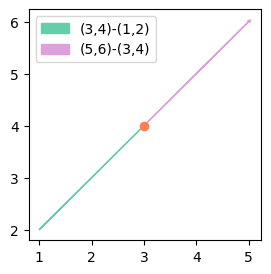

In [12]:
vis_intersection(s1[0],s1[1],s2[0],s2[1])

> * Intersección entre $s_1$ y $s_3$

La intersección se encuentra en en intervalo [(2,3),(3,4)]


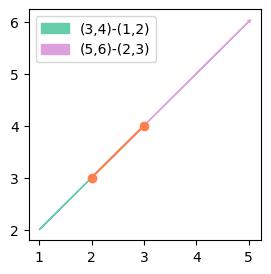

In [13]:
vis_intersection(s1[0],s1[1],s3[0],s3[1])

> * Intersección entre $s_1$ y $s_4$

No hay intersección


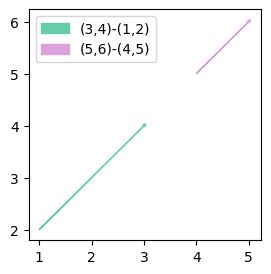

In [14]:
vis_intersection(s1[0],s1[1],s4[0],s4[1])

---

> ### **Ejercicio 2**
>
> Generar un conjunto de puntos utilizando el siguiente código

In [15]:
np.random.seed(23)
X = np.random.rand(20,2)

> Implementar el algoritmo de Jarvis-March para los puntos generados. Ilustrar el proceso con gráficas

> **Solución**
>
> Utilizaremos la misma clase punto del ejercicio anterior

```
    class Point
```



> En primer lugar, crearemos una función que reciba un conjunto de puntos aleatorio y retorneelementos del tipo `Point`

In [16]:
'''
Input: x_set: Conjunto de puntos aleatorios (np array)
Output: points: Conjunto de elementos de tipo Point
'''

def to_point(x_set):
  points = []
  for x,y in x_set:
    points.append(Point(x,y))
  return points

> Implementamos una función que permite encontrar el punto de inicio del algoritmo de Jarvis. Este punto es el que se encuentra más a la izquierda en el plano

In [17]:
'''
Input: points: Conjunto de puntos
Output: min_point: Punto más a la izquierda en el plano
        index: Índice del elemento más a la izquierda
'''

def min_p(points):
  min_point = points[0]
  index = 0
  points = points[1:]
  for i, p in enumerate(points):
    if p.x < min_point.x:
      min_point = p
      index = i+1
    elif p.x == min_point.x and p.y < min_point.y:
      min_point = p
      index = i+1
  return min_point, index

> También utilizamos la función que calcula el producto cruz 2D en el ejercicio anterior

```
    cross
```

> Y definimos una función que permite determinar cuando un punto gira a la izquierda para llegar a otro



In [18]:
'''
Input: p0, p1, p2: punto 1, punto 2, punto 3
Output: Retorna verdadero si p1 está rotado en contra de las manecillas con respecto a p2 con p0 de origen
'''

def turn_left(p0, p1, p2):
  if cross(p0, p1, p2) > 0:
    return False
  elif cross(p0, p1, p2) < 0:
    return True
  else:
    return False

> El algoritmo de Jarvis toma un punto inicial y busca el que está más a la izquierda de los demás. La función a continuación calcula el siguiente punto del algoritmo, para esto utilizaremos la función `turn_left` para actualizar el punto cada vez que se pueda realizar un nuevo giro a la izquierda. Adicionalmente, graficaremos los puntos que va tomando el algoritmo como un posible *next_point* hasta encontrar el correcto.

In [19]:
'''
Input: Points: Puntos que aún no hacen parte del polígono
       Point: Punto actual
       c_points: Puntos que ya hacen parte del poligono convexo
       f_point: Punto inicial
       o_points: Conjunto de puntos completo
Output: i: Siguiente punto del polígono
'''

def next_point(points, point, c_points, i_point, o_points):
  points_temp = points.copy()
  i = points_temp.pop(0)
  while points_temp:
    if turn_left(point, i, points_temp[0]):
      points_temp.pop(0)
    else:
      i = points_temp.pop(0)
      clear_output(wait=True)
      plt.scatter([p.x for p in o_points],[p.y for p in o_points], color='cadetblue')
      plt.scatter(i_point.x, i_point.y, color='orchid')
      plt.plot([p.x for p in c_points],[p.y for p in c_points], color = 'cadetblue')
      plt.plot([point.x, i.x], [point.y, i.y], color = 'palegreen')
      plt.title('Procedimiento')
      plt.show()
      sleep(.5)
  return i

> Implementamos el algoritmo de Jarvis. Este se ejecuta mientras el punto siguiente no sea el mismo punto de origen.

In [20]:
'''
Input: points: Conjunto de puntos
Output: s: Camino de puntos en la frontera del polígono convexo
'''

def jarvis_march(points):

  points_temp = points.copy()
  [min_point, index] = min_p(points)
  points_temp.pop(index)
  s = [min_point]

  # Realizamos la primera iteración
  min_point = next_point(points_temp, min_point, s, s[0], points)
  index = points_temp.index(min_point)
  s.append(min_point)
  points_temp.pop(index)
  # Volvemos a agregar el punto original (criterio de parada)
  points_temp.append(s[0])

  while len(points_temp) > 1 and min_point != s[0]:
    min_point = next_point(points_temp, min_point, s, s[0], points)
    index = points_temp.index(min_point)
    s.append(min_point)
    points_temp.pop(index)

  s.append(s[0])

  clear_output(wait=True)
  plt.scatter([p.x for p in points], [p.y for p in points], color = 'cadetblue')
  plt.plot([p.x for p in s], [p.y for p in s], color = 'cadetblue')
  plt.title('Solución')

  plt.show()

  return s

> **Demostración**
>
> Probamos el algoritmo (el paso a paso se muestra en la ejecución)

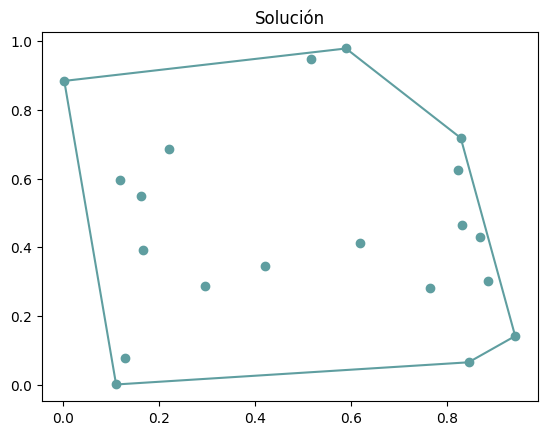

[(0.002464881200886171, 0.8840321823721048),
 (0.5895818652147146, 0.9784269160148309),
 (0.8287514843227557, 0.7178518382260383),
 (0.9421662328554996, 0.14150075772518977),
 (0.8450938221263111, 0.06507543905719348),
 (0.11047771391367378, 0.0005288111692760555),
 (0.002464881200886171, 0.8840321823721048),
 (0.002464881200886171, 0.8840321823721048)]

In [21]:
points = to_point(X)
jarvis_march(points)

> **Preguntas**
>
> * ¿Qué modelos podrían implementarse mediante el algoritmo de envolvente convexa? Algunos modelos existentes son:
>   * El modelo descrito en [Convex hull algorithms based on some variational models](https://arxiv.org/pdf/1908.03323.pdf) que utiliza un método de representación por niveles, es una varíación de los algoritmos de envolvente convexa, que permite trabajar con cobjetos que presentan valores atípicos (bastante útil en aplicaciones como visión por computadora).
>   * Otro modelo es *Graham Scan*, que determina la envolvente mediante las pendientes entre el punto actual y los demás puntos en el plano.
> * ¿Qué sistemas pueden ser descritos por estos modelos?
>   * Visión por computadora. Una de las aplicaciones de la envolvente convexa se encuentra en detectar los bordes de una imagen. En este caso, los puntos representarían puntos de interés en la imagen, y la envolvente representaría el contorno de la figura.
>   * GeoGeographical Information Systems: Otra aplicación de las envolventes es la de encontrar una ubicación geográfica, como indican en el artículo [Determining Fire Station Location Using Convex Hull](https://repositori.unud.ac.id/protected/storage/upload/repositori/84fbe8c482f846afcfceed498d67578a.pdf), mediante la construcción de un polígono convexo cuyo centroide es seleccionado como el mejor candidato para construir una estación de bomberos, dado que su distancia euclidea a los demás puntos es la mínima.

---

> ### **Ejercicio 3**
>
> Implementar el algoritmo de línea de barrido y aplicarlo al conjunto de segmentos dado en el archivo segmentos.csv. Identificar puntos de intersección y segmentos intersectados. Grafica el proceso y los resultados

> **Solución**
>
> Para este ejercicio necesitaremos la clase `Point` en conjunto con sus métodos definidos previamnte. Adicionalmente utilizaremos la función que encuentra intersecciones.

```
    Intersection
```



> Implementaremos la clase `Node` que nos permitirá crear árboles

In [22]:
'''
Clase Nodo con
  Atributos: hijo izquierdo, hijo derecho, información del nodo
  Métodos: __str__: Representación de cadena informal del objeto
           copy: Permite copiar un árbol (nodo raíz y sus hijos)
'''

class Node:

  def __init__(self, label):
    self.left = None
    self.right = None
    self.label = label

  def __str__(self):
    return(str(self.label))

  def copy(self):
    temp = Node(self.label)
    if self.right is not None:
      temp.right = self.right.copy()
    if self.left is not None:
      temp.left = self.left.copy()
    return temp

> Definiremos el método *inorder*, que nos permite leer el árbol de izquierda a derecha, ya que en muchas ocasiones es necesario organizar bajo este criterio

In [23]:
'''
Input: root: Nodo raíz del árbol
Output: inorderArr: Lista con todos los elementos de árbol ordenados de izquierda a derecha
'''

def inorder(root):
  inorderArr = []

  if root.left is not None:
    leftInorderArr = inorder(root.left)
    inorderArr.extend(leftInorderArr)

  inorderArr.append(root.label)

  if root.right is not None:
    rightInorderArr = inorder(root.right)
    inorderArr.extend(rightInorderArr)

  return inorderArr

> Definiremos algunas funciones que permiten trabjar con árboles. Primero, `Insert` nos permite agregar nuevos nodos al árbol considerando un criterio predeterminado. Crearemos dos de este tipo:
>
> `insertBST_point` que agrega puntos a un árbol, teniendo en cuenta que, para $p, q \in R$:

$$
p<q \iff p_y > q_y \lor (p_y = q_y \land p_x < q_x)
$$



In [24]:
'''
Input: root: Nodo raíz
       node: Nodo a insertar
Output: No retorna nada, solo modifica el árbol
'''

def insertBST_point(root, node):
  if root.label.y > node.label.y or (root.label.y == node.label.y and root.label.x < node.label.x):
    if root.right == None:
      root.right = node
    else:
      insertBST_point(root.right, node)
  else:
    if root.left == None:
      root.left = node
    else:
      insertBST_point(root.left, node)

> `insertBST_segment` agrega segmentos a un árbol teniendo en cuenta que, un segmento nuevo se añade a la derecha de un nodo si este se encuentra a la derecha de la parte del segmento en la que está la línea de barrido. Por tanto, definiremos primero la función `slope` que calcula la pendiente

In [25]:
'''
Input: p1, p2: Puntos de interés
Output: Retorna la pendiente de la recta p1p2
'''

def slope(p1,p2):
  return (p2.y - p1.y)/(p2.x - p1.x)

> `actual_point` que permite encontrar el punto actual por el que pasa la línea de barrido tomando la ecuación general de la recta del segmento en cuestión

In [26]:
'''
Input: seg: Segmento de interés
Output: Punto actual que toca la línea de barrido en el segmento
'''

def actual_point(seg, y):
  m = slope(seg.label[0], seg.label[1])
  return Point((y - seg.label[0].y)/m + seg.label[0].x, y)

> Y `leftmost_point` que indica el segmento más a la izquierda cuando dos segmentos pasan por el mismo punto


In [27]:
'''
Input: s1, s2: Segmentos de interés
       com_p: Punto en común
Output: Retorna el segmento más a la izquierda
'''

def leftmost_point(s1, s2, com_p):
  if s1.label[0] == com_p:
    ex1 = s1.label[1].x
  else:
    ex1 = s1.label[0].x
  if s2.label[0] == com_p:
    ex2 = s2.label[1].x
  else:
    ex2 = s2.label[0].x
  if ex1 < ex2:
    return s1
  return s2

> `insertBST_segment`

In [28]:
'''
Input: tau: Raíz del árbol de segmentos
       s: Segmento a insertar
       p: Punto actual del algoritmo
Output: No retorna nada, solo modifica el árbol
'''

def insertBST_segment(tau, s, p):
  root = actual_point(tau, p.y)
  node = actual_point(Node(s), p.y)

  if root.x == node.x:
    temp_node = leftmost_point(tau, Node(s), root)
    if temp_node.label == tau.label:
      if tau.right == None:
        tau.right = Node(s)
      else:
        insertBST_segment(tau.right, s, p)
    else:
      if tau.left == None:
        tau.left = Node(s)
      else:
        insertBST_segment(tau.left, s, p)

  elif root.x < node.x:
    if tau.right == None:
      tau.right = Node(s)
    else:
      insertBST_segment(tau.right, s, p)
  else:
    if tau.left == None:
      tau.left = Node(s)
    else:
      insertBST_segment(tau.left, s, p)

> Definiremos también una función `deleteBST_segment` que nos permite eliminar un nodo y guardar los elementos que se encuentren debajo de este

In [29]:
'''
Input: tau: Raíz del árbol de segmentos
       s: Segmento a eliminar
       parent: Padre del nodo actual
       direction: l si es el hijo izquierdo, d en caso contrario
Output:  l: lista (inorder) de nodos bajo el eliminado
'''

def deleteBST_segment(tau, s, parent, direction):
  l = []
  if tau.label == s:
    if direction == 'l':
      parent.left = None
    elif direction == 'r':
      parent.right = None
    l.append(inorder(tau))
  else:
    if tau.left != None:
      l.extend(deleteBST_segment(tau.left, s, tau, 'l'))
    if tau.right != None:
      l.extend(deleteBST_segment(tau.right, s, tau, 'r'))

  return l

> En el algoritmo de `sweep_line` es necesario conocer que segmentos pasan por determinado punto $(x,y)$, para esto definiremos la función `belongs` que determina si un punto pertenece al segmento

In [30]:
'''
Input: p0, p1, p2: Puntos de interés
Output: Retorna True si el punto p1 se encuentra en el segmento p0p2
'''

def belongs(p0,p1,p2):
  m = slope(p0, p2)
  y_hat = m*(p1.x-p2.x) + p2.y
  if abs(y_hat - p1.y) < 0.001 and p1.y != p0.y and p1.y != p2.y:
    return True
  return False

> Y la función `through_point` que recorre el árbol de segmentos y retorna aquellos que pasan por el punto de interés

In [31]:
'''
Input: tau: Nodo raíz
       p: Punto de interés
Output: l_nodes: Lista de segmentos que pasan por p
'''

def through_point(tau, p):

  l_nodes = []

  if belongs(tau.label[0], p, tau.label[1]):
    l_nodes.append(tau.label)

  if tau.right is not None:
    l_nodes.extend(through_point(tau.right, p))

  if tau.left is not None:
    l_nodes.extend(through_point(tau.left, p))

  return l_nodes

> Ahora, definiremos dos funciones auxiliares, `organize_elements` organiza una lista de puntos o segmentos utilizando árboles

In [32]:
'''
Input: elements: Lista a ordenar
       kind: 1 si es de puntos, 2 si es de segmentos
       p: Punto actual de la línea (cuando es lista de segmentos)
Output: Lista con los elementos ordenados de izquierda a derecha
'''

def organize_elements(elements, kind, p):
  new = []
  if elements:
    root = Node(elements[0])
    if kind == 1:
      for po in elements[1:]:
        insertBST_point(root, Node(po))
      new = inorder(root)
    else:
      for seg in elements[1:]:
        insertBST_segment(root, seg, p)
      new = inorder(root)
  return new

> Y `neighbors` que dado un segmento retorna aquellos que se encuentran a la izquierda y a la derecha

In [33]:
'''
Input: root: Nodo raíz
       s: Segmento de interés
Output: sl: Lista con vecinos a la izquierda
        sr: Lista con vecinos a la derecha
'''

def neighbors(root, s):
  new_list = inorder(root)
  order_list = []
  [order_list.append(x) for x in new_list if x not in order_list]
  sl = []
  sr = []
  index = order_list.index(s)
  index_l = index-1
  index_r = index +1
  while index_l >= 0:
    sl.append(order_list[index_l])
    index_l -= 1
  while index_r < len(order_list):
    sr.append(order_list[index_r])
    index_r += 1
  return sl, sr

> Por último, la función `re_order` que se encarga de re-organizar punto superior e inferior de los segmentos, con el fin de que sea más sencillo implementar la línea de barrido (en este caso, el punto superior de un segmento es el que se encuentra más arriba en el eje y de los dos)

In [34]:
'''
Input: segments: Lista de segmentos
Output: segments: Lista con cada segmento ordenado (extremo superior primero)
'''

def re_order(segments):
  for i,j in segments:
    if i > j:
      segments[segments.index([i,j])] =(j,i)
  return segments

> Implementamos el algoritmo de la línea de barrido. Tenemos la función `find_new_event` que encuentra un nuevo punto evento (es decir, si es una intersección y la línea de barrido no ha pasado por él)

In [35]:
'''
Input: s1,s2: Segmentos de interés (para evaluar intersección)
       p: Punto actual de la línea
       Q: Lista con puntos evento
Output: segments: Lista con cada segmento ordenado (extremo superior primero)
'''

def find_new_event(s1,s2,p,Q):
  inter = intersection(s1[0],s1[1],s2[0],s2[1])
  if inter != None and inter.y < p.y:
    if inter not in Q:
      Q.append(inter)
      Q = organize_elements(Q, 1, None)
  return Q

> `process_point` se encarga de manipular cada punto evento

In [36]:
'''
Input: p: Punto de interés (de la forma (x,y))
       segments: Conjunto de segmentos (de la forma [(x1,y1), (x2,y2)])
       tau: Nodo raíz (None al principio)
       Q: Lista con los puntos evento (Vacío al comenzar)
       intersections: Diccionario con llave = punto de intersección
                      valor = Segmentos que se intersectan en el punto
Output: Q, tau, intersection
'''

def process_point(p, segments, tau, Q, intersections):
  u = []
  c = []
  l = []

  # Agregamos los segmentos que empiezan en p
  for i, j in segments:
    if p == i:
      u.append([i,j])
    if p == j:
      l.append([i,j])
  u = organize_elements(u, 2, p)
  l = organize_elements(l, 2, p)

  # A partir de los elementos en T definimos C(p)
  if tau != None:
    c = through_point(tau, p)
    c = organize_elements(c, 2, p)

  if len(u + c + l) > 1:
    temp_list = u+c+l
    list_of_intersections = []
    [list_of_intersections.append(el) for el in temp_list if el not in list_of_intersections]
    intersections[p] = list_of_intersections

  # Borramos los segmentos L(p) y C(p) del árbol
  for seg in c:
    nodes = deleteBST_segment(tau, seg, None, '')
    if nodes:
      nodes = nodes[0]
    # Volvemos a agregar los nodos debajo del eliminado
    for n in nodes:
      if n != seg:
        insertBST_segment(tau, n, p)

  for seg in l:
    nodes = deleteBST_segment(tau, seg, None, '')
    if nodes:
      nodes = nodes[0]
    # Volvemos a agregar los nodos debajo del eliminado
    for n in nodes:
      if n != seg:
        insertBST_segment(tau, n, p)

  u_union_c = organize_elements(u+c, 2, p)

  # Agregamos U(p) y C(p) al árbol
  for i,j in u_union_c:
    if tau == None:
      tau = Node([i,j])
    else:
      insertBST_segment(tau, [i,j], i)

  # Si solo hay elementos en L(p)
  if len(u_union_c) == 0:
    for iseg in l:
      tau_temp = tau.copy()
      insertBST_segment(tau_temp, iseg, p)
      [sl, sr] = neighbors(tau_temp, iseg)
      if sl and sr:
        Q = find_new_event(sl[0],sr[0],p,Q)
  else:
    sl_uc = u_union_c[0]
    sr_uc = u_union_c[-1]
    tau_temp = tau.copy()
    [sl,_] = neighbors(tau_temp, sl_uc)
    [_,sr] = neighbors(tau_temp, sr_uc)
    while sl:
      Q = find_new_event(sl[0],sl_uc,p,Q)
      sl.pop(0)
    while sr:
      Q = find_new_event(sr[0],sr_uc,p,Q)
      sr.pop(0)

  return Q, tau, intersections

> FInalmente, la línea de barrido

In [37]:
'''
Input: segments: Lista de segmentos (de la forma [p1,p2])
Output: intersections: Diccionario con llave = punto de intersección
                       valor = Segmentos que se intersectan en el punto
'''

def sweep_line(segments):
  Q = set()
  segmennts = re_order(segments)

  # Agregamos todos los puntos a Q
  for i,f in segments:
    Q.add(i)
    Q.add(f)
  Q = list(Q)

  # Organizamos la lista
  Q = organize_elements(Q, 1, None)
  xs = [element.x for element in Q]
  x_min = min(xs)
  x_max = max(xs)
  intersections = {}
  tau = None

  while Q:
    p = Q.pop(0)

    # Graficamos
    clear_output(wait=True)
    plt.plot([x_min,x_max], [p.y,p.y], color = 'black')
    for i, j in segments:
      plt.plot([i.x, j.x], [i.y, j.y])
    res = list(intersections.keys())
    plt.scatter([element.x for element in res], [element.y for element in res], color = 'black')
    plt.title('Procedimiento')
    plt.show()
    sleep(.5)
    [Q, tau, intersections] = process_point(p, segments, tau, Q, intersections)

  clear_output(wait=True)
  for i, j in segments:
      plt.plot([i.x, j.x], [i.y, j.y])
  res = list(intersections.keys())
  plt.scatter([element.x for element in res], [element.y for element in res], color = 'black')
  plt.title('Solución')
  plt.show()
  sleep(.5)

  return intersections

> **Demostración**
>
> Tomaremos los siguientes puntos

In [38]:
ss1 = [Point(0.517, 0.947), Point(0.765, 0.282)]
ss2 = [Point(0.221, 0.686), Point(0.167, 0.392)]
ss3 = [Point(0.618, 0.412), Point(0.002, 0.884)]
ss4 = [Point(0.885, 0.3), Point(0.59, 0.978)]
ss5 = [Point(0.845, 0.065), Point(0.295, 0.288)]
ss6 = [Point(0.822, 0.626), Point(0.11, 0.001)]
ss7 = [Point(0.942, 0.142), Point(0.422, 0.346)]
ss8 = [Point(0.87, 0.429), Point(0.829, 0.718)]
ss9 = [Point(0.119, 0.596), Point(0.13, 0.078)]
ss10 = [Point(0.831, 0.464), Point(0.162, 0.548)]

> Y crearemos una lista de segmentos para nuestro algoritmo (el paso a paso se muestra en la ejecución)

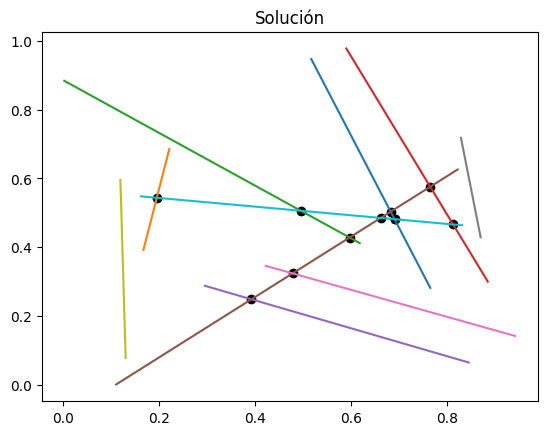

{(0.7649470178126279, 0.5759183794001298): [[(0.59, 0.978), (0.885, 0.3)],
  [(0.822, 0.626), (0.11, 0.001)]],
 (0.194894444941408, 0.5438697557921102): [[(0.221, 0.686), (0.167, 0.392)],
  [(0.162, 0.548), (0.831, 0.464)]],
 (0.4950911735296791, 0.5061768930097263): [[(0.002, 0.884), (0.618, 0.412)],
  [(0.162, 0.548), (0.831, 0.464)]],
 (0.6824084394093686, 0.503465273357943): [[(0.517, 0.947), (0.765, 0.282)],
  [(0.822, 0.626), (0.11, 0.001)]],
 (0.6616702801438695, 0.4852611307442675): [[(0.822, 0.626), (0.11, 0.001)],
  [(0.162, 0.548), (0.831, 0.464)]],
 (0.6905496459169018, 0.4816350220373397): [[(0.162, 0.548), (0.831, 0.464)],
  [(0.517, 0.947), (0.765, 0.282)]],
 (0.6905496459169019, 0.4816350220373397): [[(0.162, 0.548), (0.831, 0.464)],
  [(0.517, 0.947), (0.765, 0.282)]],
 (0.8126400296640407, 0.46630528775518776): [[(0.162, 0.548), (0.831, 0.464)],
  [(0.59, 0.978), (0.885, 0.3)]],
 (0.5967554391843165, 0.42827829984578347): [[(0.002, 0.884), (0.618, 0.412)],
  [(0.822, 

In [39]:
segments = [ss1,ss2,ss3,ss4,ss5,ss6,ss7,ss8,ss9,ss10]
sweep_line(segments)

> ### **Referencias**
>  * Algoritmo de intersección: Thomas H. Cormen et al. Introduction to Algorithms. 3rd ed. MIT Press, 2009
>
> * Agortitmo de Jarvis: Cosultado en la web:
>   * [Gift Wrap Algorithm (Jarvis March Algorithm) to find Convex Hull](https://iq.opengenus.org/gift-wrap-jarvis-march-algorithm-convex-hull/)
>   * [Convex Hull Algorithms: Jarvis's March](https://algorithmtutor.com/Computational-Geometry/Convex-Hull-Algorithms-Jarvis-s-March/)
>
> * Envolvente conexa:
>   * Lingfeng Li et al. Convex hull algorithms based on some variational models. Aug. 2019.
>   * Consultado en la web: [Contours and Convex Hull in OpenCV Python](https://medium.com/analytics-vidhya/contours-and-convex-hull-in-opencv-python-d7503f6651bc)
>   * Consultado en la web: [Introduction to Convex Hull Applications](https://people.montefiore.uliege.be/briquet/algo3-chull-20070206.pdf)
>   *  Putu Eka N. Kencana, G.A. Purnawa, and Putu H. Gunawan. Determining Fire
Station Location Using Convex Hull. 2015.
>
> * Línea de barrido: Consultado en la web: [Geometría Computacional](https://www.uv.mx/anmarin/slides/CG_2.pdf)